In [1]:
# installing libraries

! pip install pandas
! pip install seaborn
! pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# importing all the nessesary tools

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN 


In [3]:
def plot_cmatrix(test, pred):
    cmat = confusion_matrix(test, pred)
    fig = plt.figure(figsize=(3, 3))
    plt.matshow(cmat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(2))
    plt.xticks(range(2))
    plt.colorbar()
    plt.xlabel('Predicted risk')
    plt.ylabel('Actual risk')

    for i in range(2):
        for j in range(2):
            plt.text(i - 0.1, j+0.05, str(cmat[j, i]), color='red')

In [4]:
# converting csv file to pandas dataframe

customer_data = pd.read_csv("./data/customer_data.csv")
customer_data.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [5]:
# amount of Nan in each column
print(customer_data.isnull().sum())

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64


In [6]:
# filling out all Nans in "fea_2" with its mean value

customer_data['fea_2'].fillna(customer_data['fea_2'].mean(), inplace=True)

In [7]:
# complete dataset
# key element is 'label'. it divides all customers into low(0) and high(1) credit risk groups

customer_data.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,48.211113,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1250.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1283.911373,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1310.000000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [8]:
x, y = customer_data.iloc[:, 2:], customer_data.iloc[:, 0]

## Plain classifier 

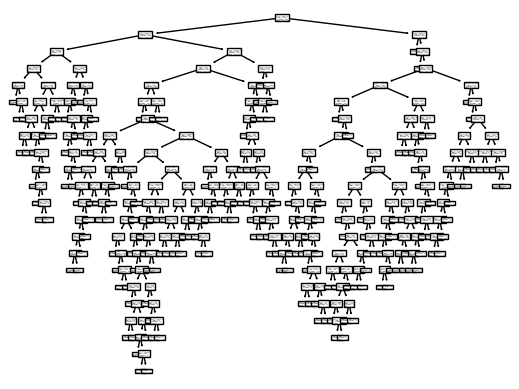

In [9]:
# doing a train/test split
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.20, random_state=14)
# building a tree
clf1 = DecisionTreeClassifier(random_state=14)
clf1.fit(x1_train, y1_train)
plot_tree(clf1)
plt.show()

In [10]:
print(f"tree depth: {clf1.get_depth()}, \namount of nodes: {clf1.get_n_leaves()}")

tree depth: 21, 
amount of nodes: 190


In [11]:
print(classification_report(y1_test, clf1.predict(x1_test)))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       178
           1       0.26      0.28      0.27        47

    accuracy                           0.68       225
   macro avg       0.53      0.53      0.53       225
weighted avg       0.69      0.68      0.69       225



test score: 1.0


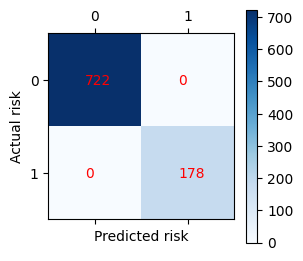

In [12]:
print(f'test score: {clf1.score(x1_train, y1_train)}')
plot_cmatrix(y1_train, clf1.predict(x1_train))

test score: 0.6844444444444444


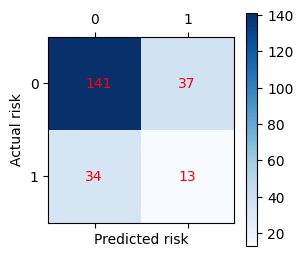

In [13]:
print(f'test score: {clf1.score(x1_test, y1_test)}')
plot_cmatrix(y1_test, clf1.predict(x1_test))

test score: 0.9368888888888889


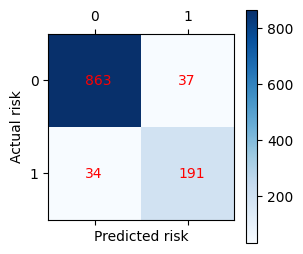

In [14]:
print(f'test score: {clf1.score(x, y)}')
plot_cmatrix(y, clf1.predict(x))

## Improved classifier

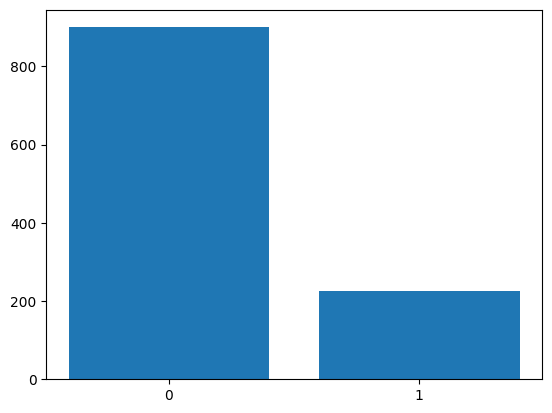

In [15]:
# amount of risk group 1 and 0 are very different

distribution = pd.DataFrame({'Risk group': customer_data["label"].value_counts().index,
                   'Count': customer_data["label"].value_counts().values
                  })
plt.bar(distribution['Risk group'], distribution['Count'], ) 
plt.xticks(distribution.iloc[:, 0])
plt.show()

In [16]:
# using ADASYN

adasyn = ADASYN(random_state=14)
x2, y2 = adasyn.fit_resample(x, y)

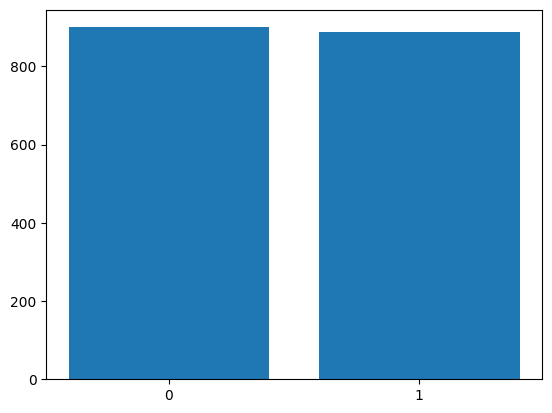

In [17]:
# new distribution is almost even

distribution = pd.DataFrame({'Risk group': y2[:].value_counts().index,
                   'Count': y2[:].value_counts().values
                  })

plt.bar(distribution['Risk group'], distribution['Count'], )
plt.xticks(distribution.iloc[:, 0])
plt.show()

In [18]:
# doing a  train/test split on new dataset

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.20, stratify=y2, random_state=14)
x2_train.describe()

,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1431.000000,1431.000000,1431.000000,1.431000e+03,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000
mean,5.440950,1280.682242,2.286513,1.143240e+05,1.915444,10.788260,4.707198,100.381551,4.077568,166927.308875,136.829369
std,1.313395,46.064513,0.849735,8.340630e+04,0.278317,2.516636,2.711580,11.282069,0.848854,151711.270200,105.903722
min,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,4.000000,1248.500000,1.000000,6.800000e+04,2.000000,8.000000,5.000000,93.000000,3.000000,60050.000000,1.000000
50%,5.000000,1283.000000,3.000000,9.700000e+04,2.000000,11.000000,5.000000,103.000000,4.000000,72000.000000,173.205081
75%,7.000000,1306.724301,3.000000,1.330906e+05,2.000000,11.000000,5.000000,110.000000,5.000000,330008.000000,201.260163
max,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


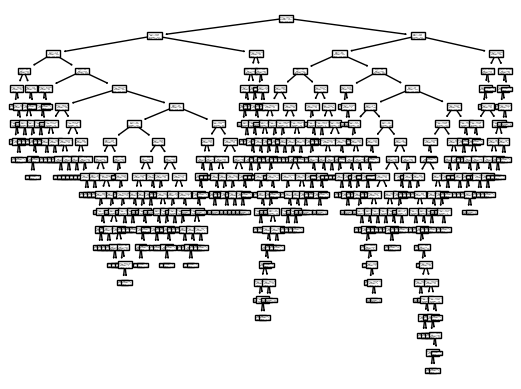

In [19]:
# training a decision tree model

clf2 = DecisionTreeClassifier(random_state=14)
clf2.fit(x2_train, y2_train)
plot_tree(clf2)
plt.show()

In [20]:
print(f"tree depth: {clf2.get_depth()}\namount of nodes: {clf2.get_n_leaves()}")

tree depth: 20
amount of nodes: 254


In [21]:
print(classification_report(y2_test, clf2.predict(x2_test)))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       180
           1       0.74      0.81      0.78       178

    accuracy                           0.77       358
   macro avg       0.77      0.77      0.77       358
weighted avg       0.77      0.77      0.77       358



train score: 1.0


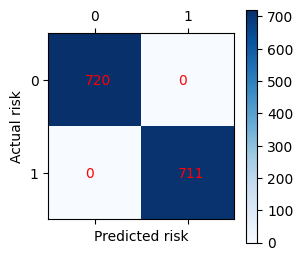

In [22]:
print(f'train score: {clf2.score(x2_train, y2_train)}')
plot_cmatrix(y2_train, clf2.predict(x2_train))

test score: 0.7681564245810056


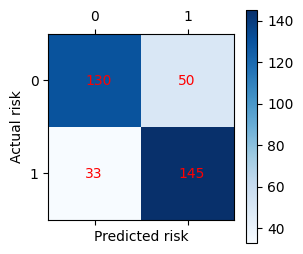

In [23]:
print(f'test score: {clf2.score(x2_test, y2_test)}')
plot_cmatrix(y2_test, clf2.predict(x2_test))

original database score: 0.9377777777777778


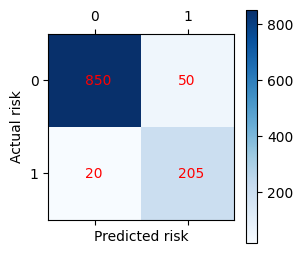

In [24]:
print(f'original database score: {clf2.score(x, y)}')
plot_cmatrix(y, clf2.predict(x))

In [25]:
# finding efficient alpha values

path = clf2.cost_complexity_pruning_path(x2_train, y2_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas[:5], impurities[:5], len(ccp_alphas)

(array([0.        , 0.00052411, 0.00052411, 0.00055905, 0.00058234]),
 array([0.        , 0.00104822, 0.00209644, 0.00321454, 0.00437922]),
 128)

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

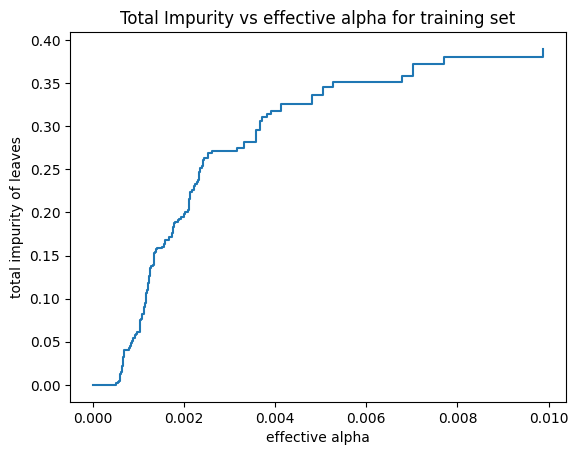

In [26]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


In [27]:
# building trees with different ccp_alpha values, which we have gotten before

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=14, ccp_alpha=ccp_alpha)
    clf.fit(x2_train, y2_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.027629515328482915


In [28]:
# getting rid of the last value because there is no split
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

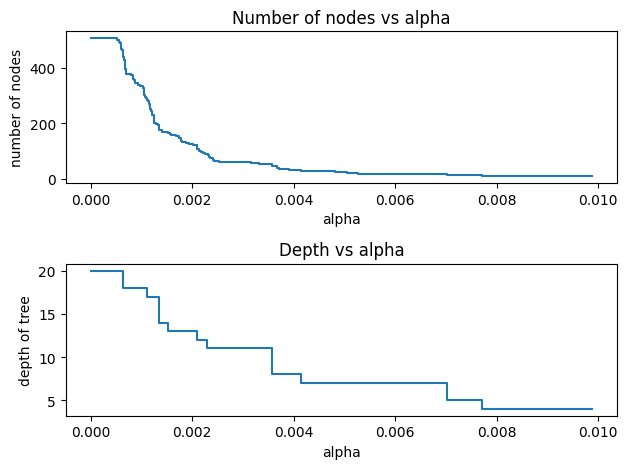

In [29]:
# checking out dependency of some parameters from ccp_alpha

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

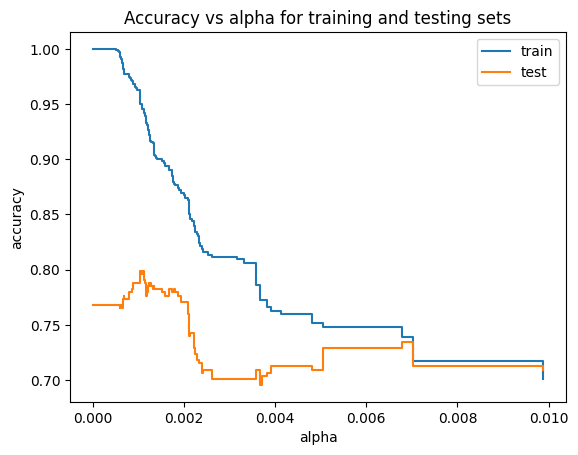

In [30]:
#comparing train and test scores with different ccp_alpha

train_scores = [clf.score(x2_train, y2_train) for clf in clfs]
test_scores = [clf.score(x2_test, y2_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [31]:
# using GridSearchCV to look for the best value of ccp_alpha
alpha_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=14),
                                 scoring=make_scorer(accuracy_score),
                                 param_grid=ParameterGrid({'ccp_alpha': [[a] for a in ccp_alphas]}))

In [32]:
alpha_grid_search.fit(x2_train, y2_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=14),
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7eff0a32a500>,
             scoring=make_scorer(accuracy_score))

In [33]:
# the best value
alpha_grid_search.best_params_['ccp_alpha']

0.0010482180293501049

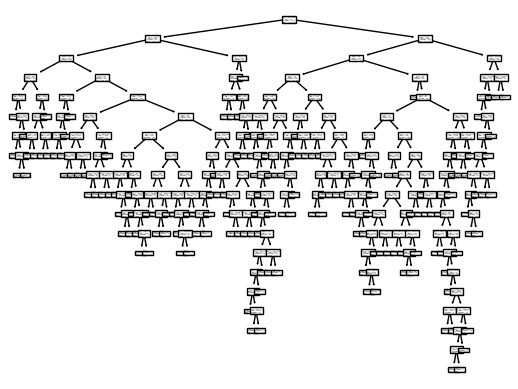

In [34]:
# building pruned tree
clf3 = DecisionTreeClassifier(random_state=14, ccp_alpha=alpha_grid_search.best_params_['ccp_alpha'])
clf3.fit(x2_train, y2_train)
plot_tree(clf3)
plt.show()

In [35]:
print(f"tree depth: {clf3.get_depth()}\namount of nodes: {clf3.get_n_leaves()}")

tree depth: 18
amount of nodes: 153


In [36]:
print(classification_report(y2_test, clf3.predict(x2_test)))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       180
           1       0.79      0.81      0.80       178

    accuracy                           0.80       358
   macro avg       0.80      0.80      0.80       358
weighted avg       0.80      0.80      0.80       358



train score: 0.9503843466107617


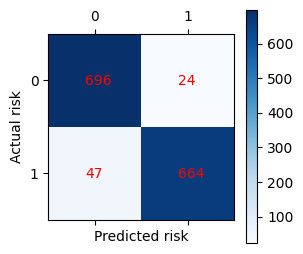

In [37]:
print(f'train score: {clf3.score(x2_train, y2_train)}')
plot_cmatrix(y2_train, clf3.predict(x2_train))

test score: 0.7988826815642458


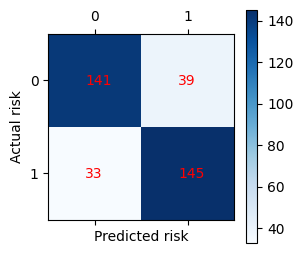

In [38]:
print(f'test score: {clf3.score(x2_test, y2_test)}')
plot_cmatrix(y2_test, clf3.predict(x2_test))

original database score: 0.8951111111111111


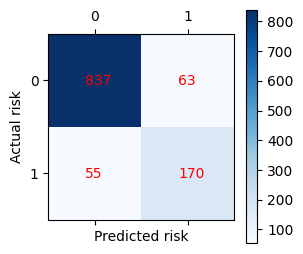

In [39]:
print(f'original database score: {clf3.score(x, y)}')
plot_cmatrix(y, clf3.predict(x))